In [13]:
import pandas as pd

data=pd.read_csv('smoke_detection_iot.csv')

original_data = data.copy()

data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [15]:
print("Informacje o zbiorze")
data.info()

Informacje o zbiorze
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [16]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [17]:
print("Brakujące dane (NaN) w każdej kolumnie")
print(data.isna().sum())

Brakujące dane (NaN) w każdej kolumnie
Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


In [18]:
print("Wartości równe 0")
for col in data.columns:
    zeros = (data[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: {zeros} zer ({zeros/len(data)*100:.2f}%)")

Wartości równe 0
Unnamed: 0: 1 zer (0.00%)
Temperature[C]: 1 zer (0.00%)
TVOC[ppb]: 2698 zer (4.31%)
PM1.0: 140 zer (0.22%)
PM2.5: 118 zer (0.19%)
NC0.5: 182 zer (0.29%)
NC1.0: 80 zer (0.13%)
NC2.5: 88 zer (0.14%)
CNT: 5 zer (0.01%)
Fire Alarm: 17873 zer (28.54%)


In [19]:
# Zbiór nie posiada pustych wartości - wstawianie 10% pustych wartości

import numpy as np

# Kopia oryginalnych danych
data_with_nan = data.copy()

missing_rate = 0.10

# pomijamy id  i Fire Alarm
cols_to_nan = [c for c in data_with_nan.columns if c not in ['Unnamed: 0', 'Fire Alarm']]

# Liczba wszystkich komórek
total_cells = data_with_nan[cols_to_nan].size
missing_cells = int(total_cells * missing_rate)

# Losowe wybieranie komórej
for _ in range(missing_cells):
    i = np.random.randint(0, data_with_nan.shape[0])  # losowy wiersz
    j = np.random.randint(0, len(cols_to_nan))  # losowa kolumna
    data_with_nan.iat[i, data_with_nan.columns.get_loc(cols_to_nan[j])] = np.nan

print("Braki po wprowadzeniu (NaN)")
print(data_with_nan.isna().sum())
print("\nŁączna liczba braków:", data_with_nan.isna().sum().sum())

Braki po wprowadzeniu (NaN)
Unnamed: 0           0
UTC               5935
Temperature[C]    5995
Humidity[%]       6001
TVOC[ppb]         5814
eCO2[ppm]         5988
Raw H2            6045
Raw Ethanol       5956
Pressure[hPa]     6005
PM1.0             5868
PM2.5             6020
NC0.5             6115
NC1.0             5886
NC2.5             5864
CNT               6006
Fire Alarm           0
dtype: int64

Łączna liczba braków: 83498


In [20]:
# przekształcenie znacznika czasu UTC
data['datetime'] = pd.to_datetime(data['UTC'], unit='s', utc=True)
data['datetime_local'] = data['datetime'].dt.tz_convert('Europe/Warsaw')

# tworzymy nowe cechy
data['hour'] = data['datetime_local'].dt.hour
data['day'] = data['datetime_local'].dt.day
data['weekday'] = data['datetime_local'].dt.weekday
data['month'] = data['datetime_local'].dt.month
data['day_of_week'] = data['datetime_local'].dt.day_name()

# pora dnia
def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

data['part_of_day'] = data['datetime_local'].dt.hour.apply(get_part_of_day)

# pora roku
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

data['season'] = data['month'].apply(get_season)

# weekend
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday'])

# Wilgotność / Temperatura — Heat Index
data['temp_humidity_ratio'] = data['Temperature[C]'] / data['Humidity[%]']

# Średnia liczba cząstek (ze wszystkich NC)
nc_cols = ['NC0.5', 'NC1.0', 'NC2.5']
data['NC_mean'] = data[nc_cols].mean(axis=1)

In [21]:
# Porównanie danych
with pd.option_context('display.max_columns', None):
    print(data.head())

   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm                  d

In [22]:
data_with_nan.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1.654733e+09,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,NaN,0.0,NaN,0.0,0.0,0
1,1,1.654733e+09,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0
2,2,1.654733e+09,20.029,NaN,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0
3,3,1.654733e+09,NaN,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0
4,4,NaN,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0


In [25]:
# Uzupełnianie brakujących danych

# Mediana
data_median = data_with_nan.copy()
numeric_cols = [c for c in data_median.columns if c not in ['Unnamed: 0', 'Fire Alarm']]

# Uzupełniamy medianą
medians = data_with_nan[numeric_cols].median()
data_median[numeric_cols] = data_median[numeric_cols].fillna(medians)

# rzutować kolumny int z powrotem na int
for col in ['CNT', 'Raw H2', 'Raw Ethanol', 'eCO2[ppm]']:
    if col in data_median.columns:
        data_median[col] = data_median[col].astype(int)

data_median.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1.654733e+09,20.000,57.36,0.0,400,12306,18520,939.735,0.0,1.88,0.0,1.942,0.0,0,0
1,1,1.654733e+09,20.015,56.67,0.0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.0,1,0
2,2,1.654733e+09,20.029,50.15,0.0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.0,2,0
3,3,1.654733e+09,20.146,55.28,0.0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.0,3,0
4,4,1.654762e+09,20.059,54.69,0.0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.0,4,0


In [26]:
data_fb_fill = data_with_nan.copy()

# Forward fill i backward fill - wypełnianie wartością z poprzedniego wiersza, a następnie z następnego
# Pytanie czy to jest dobre? Dane teoretycznie są chronologiczne
data_fb_fill = data_fb_fill.fillna(method='ffill').fillna(method='bfill')

for col in ['CNT', 'Raw H2', 'Raw Ethanol', 'eCO2[ppm]']:
    if col in data_fb_fill.columns:
        data_fb_fill[col] = data_fb_fill[col].astype(int)

data_fb_fill.head()

/tmp/ipykernel_56/3818339922.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_fb_fill = data_fb_fill.fillna(method='ffill').fillna(method='bfill')


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1.654733e+09,20.000,57.36,0.0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1.654733e+09,20.015,56.67,0.0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1.654733e+09,20.029,56.67,0.0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1.654733e+09,20.029,55.28,0.0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1.654733e+09,20.059,54.69,0.0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [28]:
from sklearn.impute import KNNImputer

data_knn = data_with_nan.copy()

num_cols = [c for c in data_knn.columns if c not in ['Unnamed: 0', 'Fire Alarm']]

# szukanie 5 najbardziej podobnych wierszy i wypełnienie średnią z ich wartości
imputer = KNNImputer(n_neighbors=5)
data_knn[num_cols] = imputer.fit_transform(data_knn[num_cols])

for col in ['CNT', 'Raw H2', 'Raw Ethanol', 'eCO2[ppm]']:
    if col in data_knn.columns:
        data_knn[col] = data_knn[col].round().astype(int)

data_knn.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1.654733e+09,20.0000,57.360,0.0,400,12306,18520,939.735,0.0,0.58,0.0,0.4404,0.0,0,0
1,1,1.654733e+09,20.0150,56.670,0.0,400,12345,18651,939.744,0.0,0.00,0.0,0.0000,0.0,1,0
2,2,1.654733e+09,20.0290,52.724,0.0,400,12374,18764,939.738,0.0,0.00,0.0,0.0000,0.0,2,0
3,3,1.654733e+09,23.3186,55.280,0.0,400,12390,18849,939.736,0.0,0.00,0.0,0.0000,0.0,3,0
4,4,1.654753e+09,20.0590,54.690,0.0,400,12403,18921,939.744,0.0,0.00,0.0,0.0000,0.0,4,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

data_encoded['part_of_day'] = data_encoded['part_of_day'].map({
    'night': 0, 'morning': 1, 'afternoon': 2, 'evening': 3
})

data_encoded['season'] = data_encoded['season'].map({
    'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3
})

data_encoded['is_weekend'] = data_encoded['is_weekend'].astype(int)

le = LabelEncoder()
data_encoded['day_of_week'] = le.fit_transform(data_encoded['day_of_week'])

data_encoded.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,...,hour,day,weekday,month,day_of_week,part_of_day,season,is_weekend,temp_humidity_ratio,NC_mean
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,...,2,9,3,6,2,0,2,0,0.348675,0.0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,...,2,9,3,6,2,0,2,0,0.353185,0.0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,...,2,9,3,6,2,0,2,0,0.357916,0.0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,...,2,9,3,6,2,0,2,0,0.362590,0.0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,...,2,9,3,6,2,0,2,0,0.366776,0.0


In [ ]:
alarms_by_part = data_encoded.groupby('part_of_day')['Fire Alarm'].mean()
print("Średni odsetek alarmów po porze dnia:\n", alarms_by_part)

# Wg sezonu
alarms_by_season = data_encoded.groupby('season')['Fire Alarm'].mean()
print("\nŚredni odsetek alarmów wg pory roku:\n", alarms_by_season)

Średni odsetek alarmów po porze dnia:
 part_of_day
0    0.786261
1    0.828974
2    0.753361
3    0.000348
Name: Fire Alarm, dtype: float64

Średni odsetek alarmów wg sezonu:
 season
2    0.714626
Name: Fire Alarm, dtype: float64


/tmp/ipykernel_56/4257905960.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data_encoded.pivot_table(


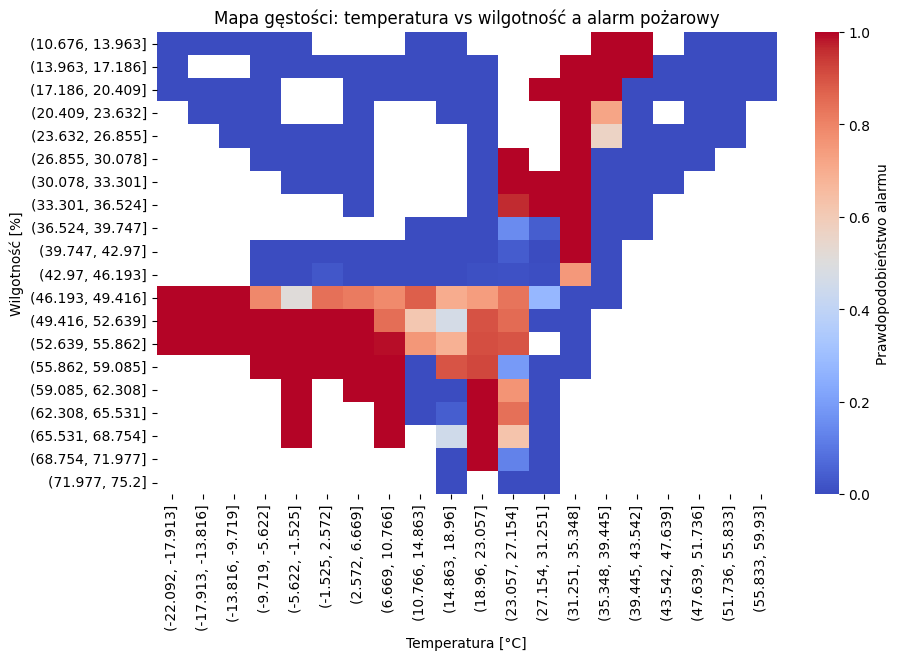

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = data_encoded.pivot_table(
    index=pd.cut(data_encoded['Humidity[%]'], bins=20),
    columns=pd.cut(data_encoded['Temperature[C]'], bins=20),
    values='Fire Alarm',
    aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Prawdopodobieństwo alarmu'})
plt.title("Mapa gęstości: temperatura vs wilgotność a alarm pożarowy")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Wilgotność [%]")
plt.show()




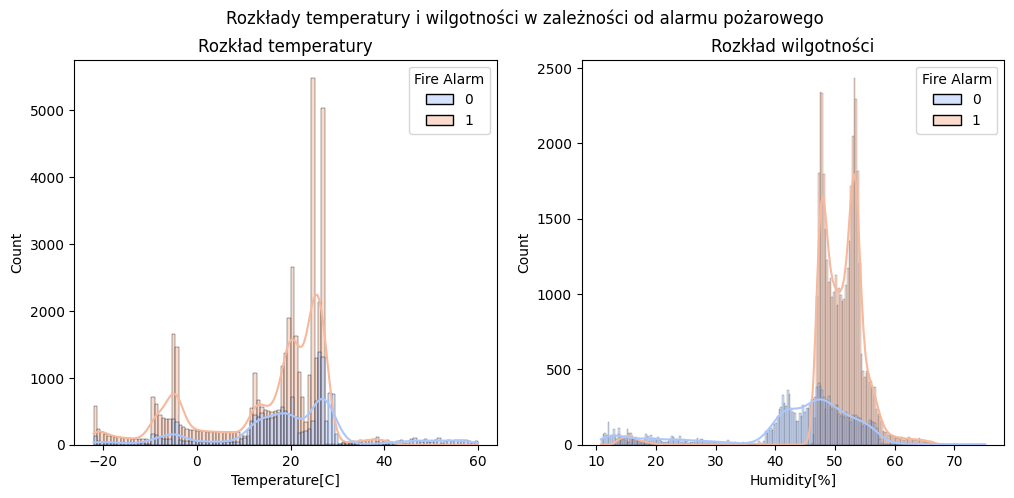

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=data_encoded, x="Temperature[C]", hue="Fire Alarm", kde=True, ax=axes[0], palette="coolwarm")
sns.histplot(data=data_encoded, x="Humidity[%]", hue="Fire Alarm", kde=True, ax=axes[1], palette="coolwarm")
axes[0].set_title("Rozkład temperatury")
axes[1].set_title("Rozkład wilgotności")
plt.suptitle("Rozkłady temperatury i wilgotności w zależności od alarmu pożarowego")
plt.show()

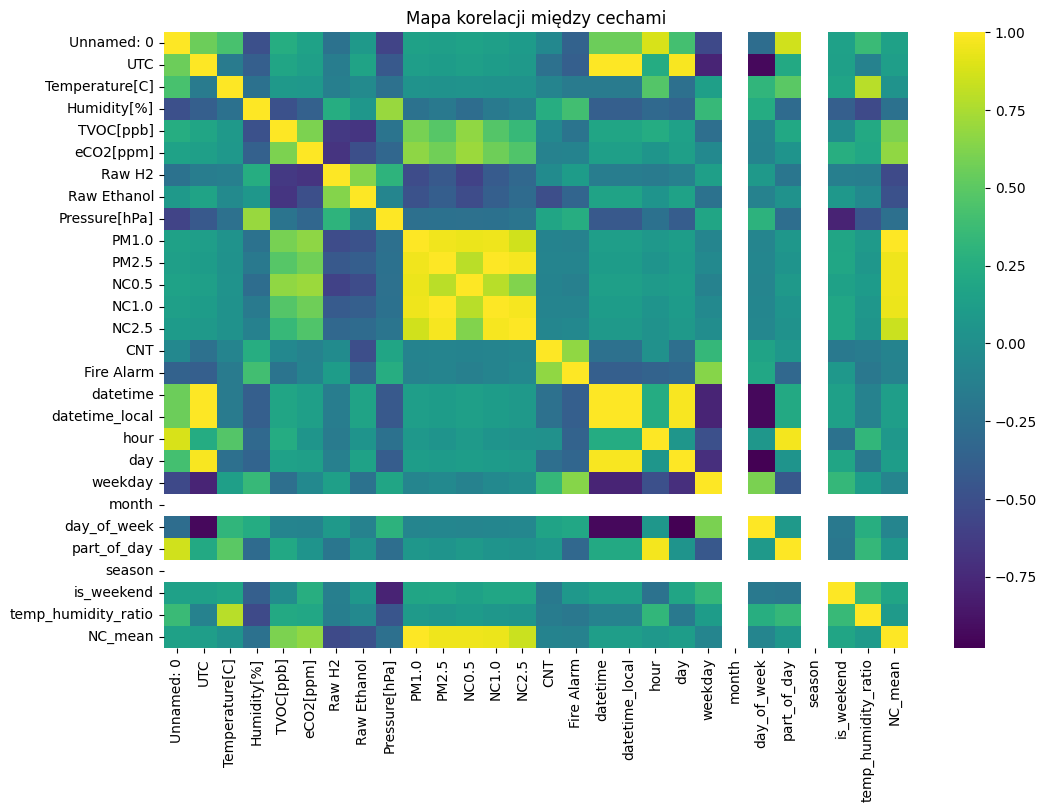

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=False, cmap='viridis')
plt.title("Mapa korelacji między cechami")
plt.show()

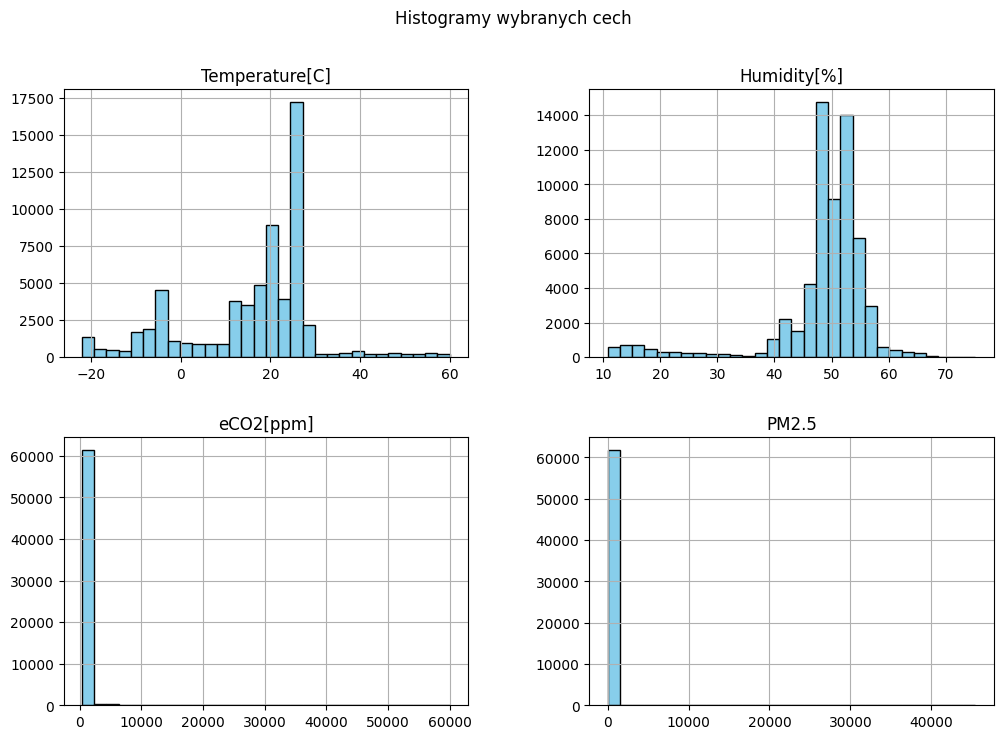

In [33]:
data_encoded[['Temperature[C]', 'Humidity[%]', 'eCO2[ppm]', 'PM2.5']].hist(
    bins=30, figsize=(12, 8), layout=(2, 2), color='skyblue', edgecolor='black'
)
plt.suptitle("Histogramy wybranych cech")
plt.show()

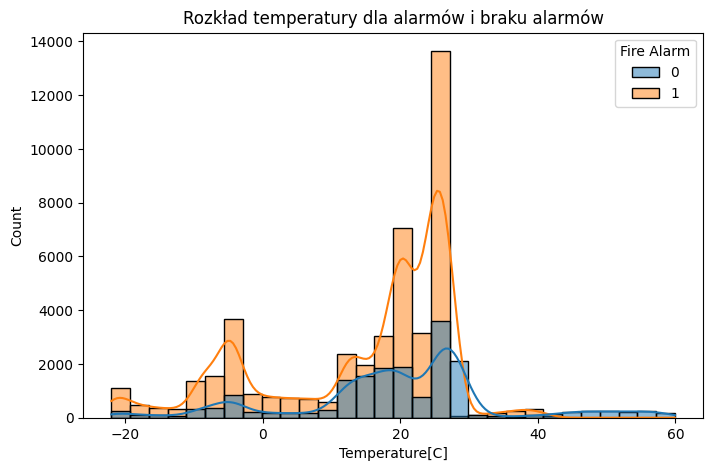

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data_encoded, x='Temperature[C]', hue='Fire Alarm', bins=30, kde=True)
plt.title("Rozkład temperatury dla alarmów i braku alarmów")
plt.show()